<a href="https://colab.research.google.com/github/Rigboone-68/Data-Science-DEP/blob/main/Predicting_House_Prices_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uploading the Kaggle API key
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasimajlal","key":"4d46ec72b93a57cbf6963287e2090710"}'}

In [ ]:
# Installing the Kaggle library
!pip install kaggle

# Downloading the dataset from Kaggle
!kaggle datasets download -d shree1992/housedata

# Unzipping the dataset
!unzip housedata.zip


Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 19.3MB/s]
Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [ ]:
# Load necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Get the data types of the columns
print(df.dtypes)

# Get basic statistical details about the numeric columns
df.describe()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.duplicated().sum()

0

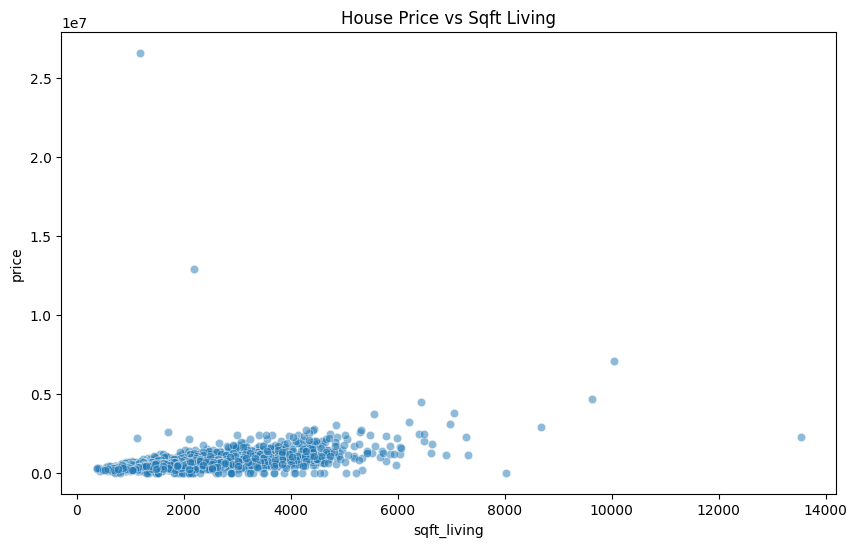

In [ ]:
# Scatter plot for sqft_living vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha = 0.5)
plt.title('House Price vs Sqft Living')
plt.show()



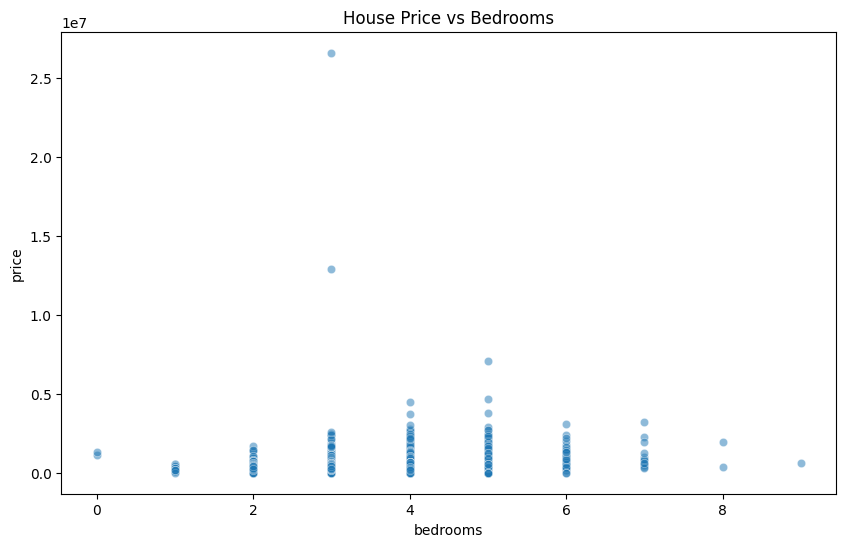

In [ ]:

# Scatter plot for bedrooms vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df, alpha=0.5)
plt.title('House Price vs Bedrooms')
plt.show()



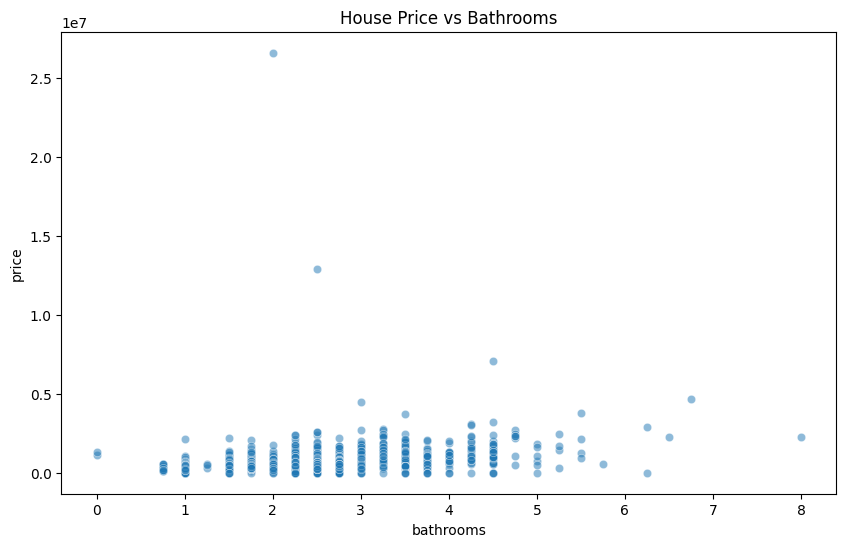

In [ ]:
# Scatter plot for bathrooms vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=df, alpha=0.5)
plt.title('House Price vs Bathrooms')
plt.show()

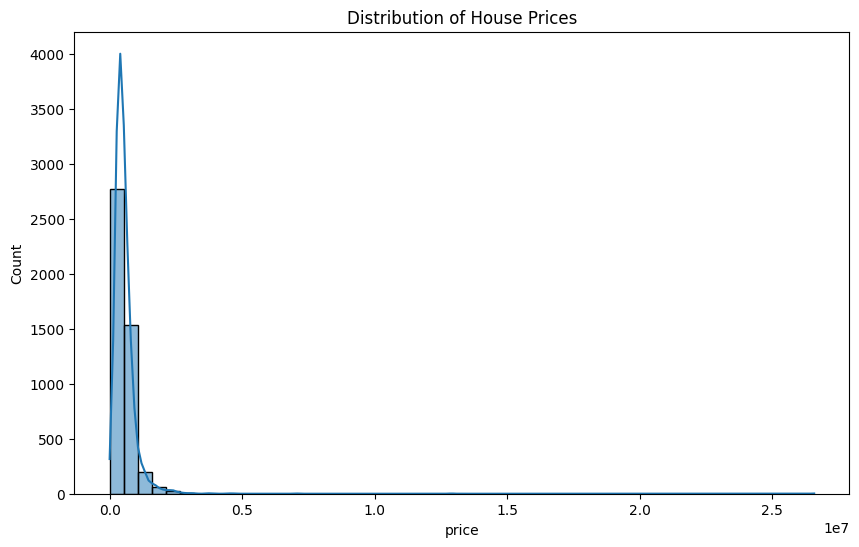

In [ ]:
# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of House Prices')
plt.show()


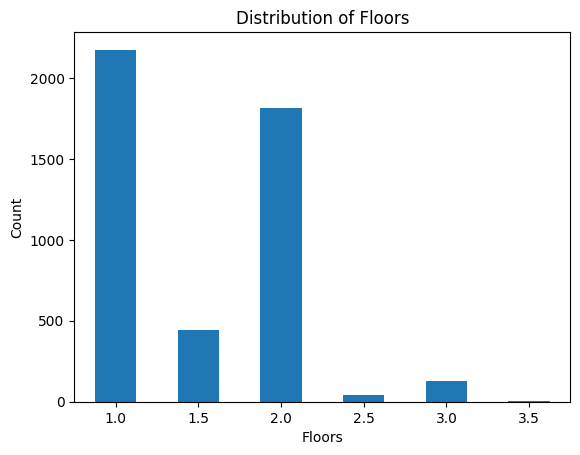

In [ ]:
#Bar Graph for distribution of floors
floors = df['floors'].value_counts().sort_index()
floors.plot(kind='bar')
plt.xlabel('Floors')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Distribution of Floors')
plt.show()


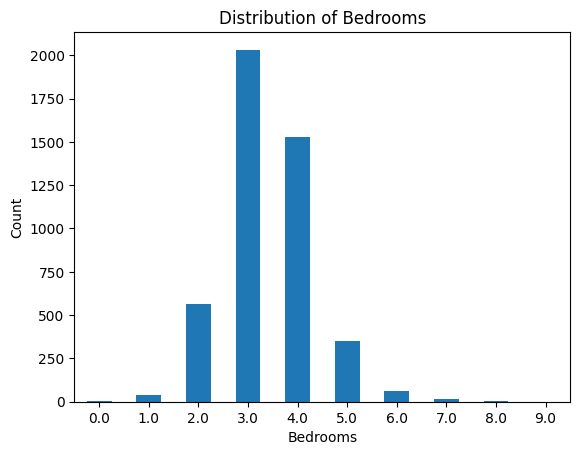

In [ ]:
#Bar Graph for distribution of bedrooms
bedrooms = df['bedrooms'].value_counts().sort_index()
bedrooms.plot(kind='bar')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Distribution of Bedrooms')
plt.show()


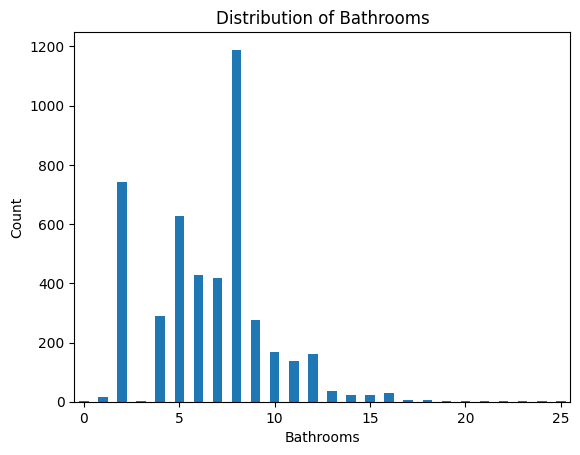

In [ ]:
#Bar Graph for distribution of bathrooms
bathrooms = df['bathrooms'].value_counts().sort_index()
bathrooms.plot(kind='bar')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.xscale('linear')
plt.title('Distribution of Bathrooms')
plt.show()


In [ ]:
#Converting the non-numeric columns to 0s and 1s
encoder = LabelEncoder()
encode = ['street', 'city', 'statezip', 'country']
for col in encode:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0


In [ ]:
from re import X
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
df = df.drop('date', axis=1)

In [ ]:
#Applying the standard scaler
from sklearn.model_selection import train_test_split # Import the required module

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into training and testing sets


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_model = LinearRegression()

In [ ]:
#Applying the linear regression model to check test and train split sequence
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_prd = linear_model.predict(X_test)


In [ ]:
Accuracy = r2_score(y_test, y_prd)
print(Accuracy)


0.03290253868355186


In [ ]:
#Applying Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='r2')

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best R² (Accuracy) for Random Forest: {grid_search_rf.best_score_ * 100:.2f}%")

# Predict using the best model
best_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test_scaled)
r2_rf_best = r2_score(y_test, y_pred_rf_best) * 100
print(f"Test set R² (Accuracy) with the best Random Forest: {r2_rf_best:.2f}%")


Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best R² (Accuracy) for Random Forest: 59.57%
Test set R² (Accuracy) with the best Random Forest: 4.84%


In [ ]:
#Appyling XGBoost
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the model
xgb_model = xgb.XGBRegressor(random_state=42)

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

# Initialize RandomizedSearchCV
grid_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb,
                                     cv=5, n_iter=50, n_jobs=-1, random_state=42, scoring='r2')

# Fit the model
grid_search_xgb.fit(X_train_scaled, y_train)

# Best parameters and score for XGBoost
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best R² (Accuracy) for XGBoost: {grid_search_xgb.best_score_ * 100:.2f}%")

# Predict using the best model
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)
r2_xgb = r2_score(y_test, y_pred_xgb) * 100
print(f"Test set R² (Accuracy) with XGBoost: {r2_xgb:.2f}%")


Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best R² (Accuracy) for XGBoost: 63.75%
Test set R² (Accuracy) with XGBoost: 5.77%
